In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for ML preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#neural network
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
#nerual net analysis
import shap
#random forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #for gridsearch of rf
#evaluation
from sklearn.metrics import r2_score

import MLACDS as dt

pd.set_option('display.max_columns', None)

2024-01-25 10:50:44.406174: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Files with useable data:
'p0.1_N54/'
'p0.2_N54/'
'p0.3_N54/'

In [2]:
N_neighbours = 8 ### number of neighbours to be extracted

dires = ['p0.2_N54/'] #data we want to load for training

In [3]:
#### list with names to be used in the final dataframe
l_s = list(range(N_neighbours))
l_s_names = []
for i in l_s:
    l_s_names.append('l'+str(i))

In [4]:
### list of columns for bond order parameter
bo = list(range(N_neighbours))
bo_names = []
for i in bo:
    bo_names.append("bo"+str(i))

In [5]:
f_r_cut_vol = 4### cut off used for the local volume calculation
# radius of local volume spher 
#keep @ 4 too small too little neighbour

f_r_cut_sp = 30###A big number here means look for the closest 
                #neighbours
               ###For a small cut-off the number of neighbours
                #might not be the same for all particles


In [6]:
df = dt.load_data(dires, l_s, l_s_names, bo, bo_names, f_r_cut_vol, f_r_cut_sp, N_neighbours)

  0%|          | 0/100 [00:00<?, ?it/s]

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


(54, 8)
(54, 8)


In [7]:
df

,l0,l1,l2,l3,l4,l5,l6,l7,bo0,bo1,bo2,bo3,bo4,bo5,bo6,bo7,vol,n_neighbours,Ds
0,0.563190,0.565949,0.580143,0.707842,0.773975,0.834769,0.884115,0.888794,3.544908,1.009394e-17,0.035187,3.646431e-17,0.254532,6.767539e-17,0.083104,7.637651e-17,0.200455,53.0,0.367946
1,0.575812,0.590612,0.632228,0.649492,0.685031,0.731453,0.744061,0.888794,3.544908,7.252131e-18,0.035187,3.590567e-17,0.254532,6.602351e-17,0.083104,7.457234e-17,0.206035,53.0,0.405260
2,0.564883,0.575887,0.607135,0.613226,0.648257,0.651667,0.694666,0.906113,3.544908,1.063815e-17,0.035187,3.653650e-17,0.254532,6.499404e-17,0.083104,7.466443e-17,0.216181,53.0,0.411686
3,0.566483,0.583332,0.648028,0.700093,0.725940,0.791908,0.866125,0.869910,3.544908,7.595735e-18,0.035187,3.633844e-17,0.254532,6.607907e-17,0.083104,7.435893e-17,0.192773,53.0,0.387032
4,0.552615,0.566483,0.706214,0.773975,0.827710,0.847720,0.905372,0.916870,3.544908,4.767561e-18,0.035187,3.616554e-17,0.254532,6.605771e-17,0.083104,7.418424e-17,0.192975,53.0,0.346245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.614620,0.621393,0.658428,0.676909,0.698650,0.743611,0.803709,0.857511,3.544908,3.059538e-17,0.034166,3.328186e-17,0.253684,4.976994e-17,0.078902,7.386497e-17,0.215685,53.0,0.393998
5396,0.544488,0.611636,0.633573,0.705376,0.734750,0.821348,0.857511,0.864222,3.544908,3.030363e-17,0.034166,3.317297e-17,0.253684,4.979619e-17,0.078902,7.383386e-17,0.198661,53.0,0.386789
5397,0.614163,0.670857,0.734750,0.767399,0.781626,0.794275,0.840062,0.852348,3.544908,2.992687e-17,0.034166,3.313902e-17,0.253684,4.981818e-17,0.078902,7.372116e-17,0.201818,53.0,0.374940
5398,0.587466,0.591041,0.593595,0.608679,0.670857,0.729277,0.758259,0.796437,3.544908,3.025256e-17,0.034166,3.306143e-17,0.253684,4.980164e-17,0.078902,7.381448e-17,0.238355,53.0,0.415230


## Data Preprocessing

In [8]:
data = df.iloc[:,:-1]

In [9]:
target = df.Ds

In [10]:
#splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=13, test_size=0.4)

In [11]:
#scaling data based on training set to prevent data leakage, the scaler computed from training set statistics will be applied to test data
scaler = preprocessing.StandardScaler().fit(X_train)

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## NN Model

In [13]:
#the first nn model. This contains:
model = keras.Sequential([
    layers.Dense(32, input_shape=(18,), activation="relu"), #input layer
    layers.Dense(16, activation="relu"), #first hidden layer less nodes
    layers.Dropout(0.5), #dropout layer with 50% dropout to prevent overfitting
    layers.Dense(1) #output layer, no activation function as must be continuous
])

2024-01-25 10:51:18.344059: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [50]:
# # Compile the model
model.compile(optimizer=optimizers.RMSprop(),
                loss='mse',
                metrics=['mae'])

In [51]:
# # Compile the model
# model.compile(optimizer=optimizers.SGD(),
#                 loss='mse',
#                 metrics=['mae'])

In [54]:
#train the model (this takes a little while)
history = model.fit(X_train_scaled, y_train,
                    epochs=100, 
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/100
102/102 [==============================] - 1s 6ms/step - loss: 1.4814e-04 - mae: 0.0084 - val_loss: 3.8264e-05 - val_mae: 0.0049
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 1.5278e-04 - mae: 0.0085 - val_loss: 2.6404e-05 - val_mae: 0.0040
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 1.5922e-04 - mae: 0.0086 - val_loss: 5.5994e-05 - val_mae: 0.0059
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 1.5841e-04 - mae: 0.0087 - val_loss: 4.7172e-05 - val_mae: 0.0054
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 1.4792e-04 - mae: 0.0084 - val_loss: 3.4687e-05 - val_mae: 0.0046
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 1.5251e-04 - mae: 0.0085 - val_loss: 4.5570e-05 - val_mae: 0.0050
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 1.4726e-04 - mae: 0.0084 - val_loss: 4.6802e-05 - val_mae: 0.0054
Epoch 8/100
1

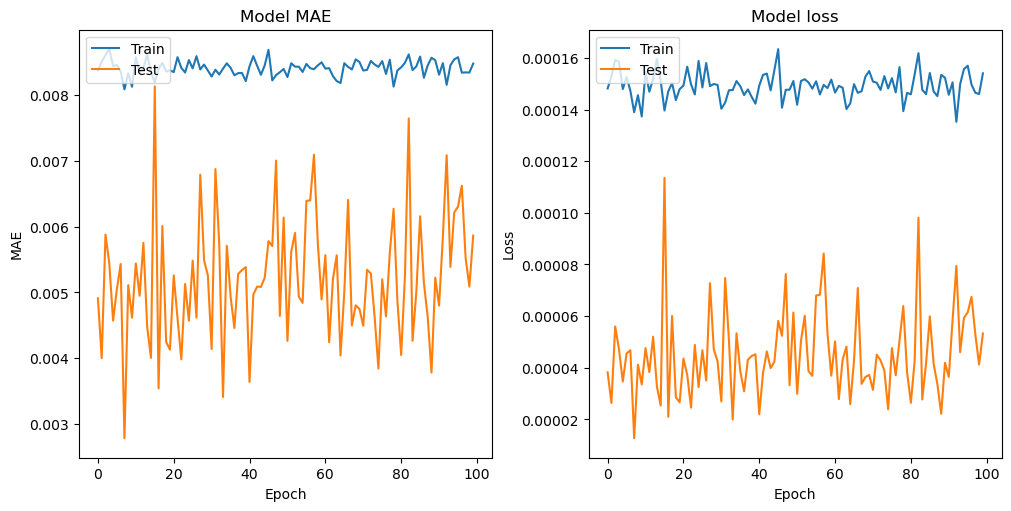

In [55]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5), layout="constrained", sharex=True)

axs[0].plot(history.history['mae'])
axs[0].plot(history.history['val_mae'])
axs[0].set_title('Model MAE')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Epoch')
# axs[0].set_ylim(0,0.01)
axs[0].legend(['Train', 'Test'], loc='upper left')

axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model loss') 
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch') 
axs[1].legend(['Train', 'Test'], loc='upper left') 

plt.show()

In [58]:
y_pred_nn = model.predict(X_test_scaled).ravel()

68/68 [==============================] - 0s 1ms/step


In [59]:
nn_r2 = r2_score(y_test, y_pred_nn)
print("NN Model R2:", nn_r2)

NN Model R2: 0.9227462310529698


## Random Forest

In [21]:
# # gridsearch to give good challenge to neural net

# params = {
#     "n_estimators":[200,300,400,500],
#     "criterion":("squared_error", "poisson", "absolute_error"),
#     "max_depth":[6,10,14,18]
#          } 

# rf = RandomForestRegressor()

# clf = GridSearchCV(rf, params, verbose=1)

In [22]:
# #fitting the model
# clf.fit(X_train_scaled, y_train)

In [23]:
# clf.best_params_

In [60]:
#run this cell instead of the gridsearch to save alot of time.
clf = RandomForestRegressor(criterion="squared_error", max_depth=14, n_estimators=300)

clf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=14, n_estimators=300)

In [61]:
#predictions
y_pred_rf = clf.predict(X_test_scaled)

In [62]:
rf_r2 = r2_score(y_test, y_pred_rf)
print("RF Model R2:", rf_r2)

RF Model R2: 0.9702627421864749
